In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading dataset from github**

In [2]:
url = 'https://raw.githubusercontent.com/Aqeel-0/test/build/diabetes.csv'
df = pd.read_csv(url)
df.head()
column_names = list(df.columns.values)


In [ ]:
X = df.iloc[:,:-1]
y = df["Outcome"]
dict_bnb = {}
dict_mnb = {}
dict_gnb = {}
dict_dtr = {}
RocAucbnb = {}
RocAucmnb = {}
RocAucgnb = {}
RocAucdtr = {}
y.info(), X.info()

In [4]:
def plot(y_test, y_pred):
  from sklearn.metrics import confusion_matrix  
  import seaborn as sns

  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Pos','False Pos','False Neg','True neg']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("**********************************************")


In [5]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report
  plot(y_test, y_pred)
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### Classification using BernoulliNB Naive Bayes

In [6]:
def FBouBernoulli(split, alpha_value = 1.0, binarize_value = 0.0, fit_prior_value = False):
  from sklearn.naive_bayes import BernoulliNB
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  #scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  #scaler.fit_transform(X_train)
  #scaler.transform(X_test)
  classifier = BernoulliNB(alpha = alpha_value, binarize = binarize_value, fit_prior = fit_prior_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value) + " binarize: " + str(binarize_value) + " fit_prior: " +str(fit_prior_value))
  print("**********************************************")
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_bnb:
    dict_bnb[str(split)] = max(accuracy, dict_bnb[str(split)])
    if str(split) == '0.3' and accuracy > dict_bnb[str(split)]:
      RocAucbnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_bnb[str(split)] = accuracy
    if str(split) == '0.3':
      RocAucbnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)


Train-test split: 0.3
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


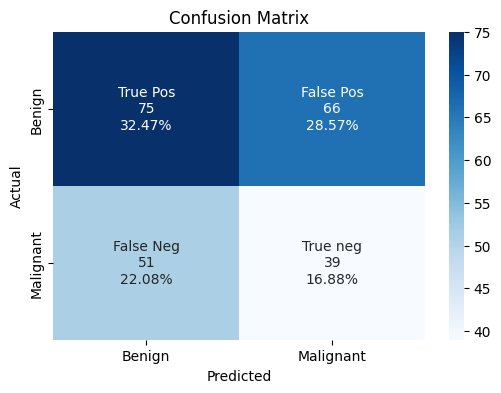

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       141
           1       0.37      0.43      0.40        90

    accuracy                           0.49       231
   macro avg       0.48      0.48      0.48       231
weighted avg       0.51      0.49      0.50       231

Train-test split: 0.3
value: alpha: 1.0 binarize: 1.5 fit_prior: False
**********************************************
Confusion Matrix : 


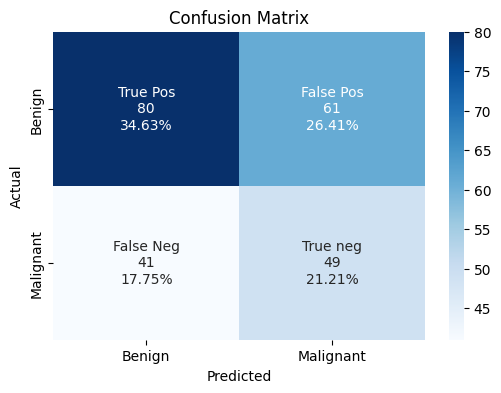

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       141
           1       0.45      0.54      0.49        90

    accuracy                           0.56       231
   macro avg       0.55      0.56      0.55       231
weighted avg       0.58      0.56      0.56       231

Train-test split: 0.3
value: alpha: 1.0 binarize: 1.5 fit_prior: True
**********************************************
Confusion Matrix : 


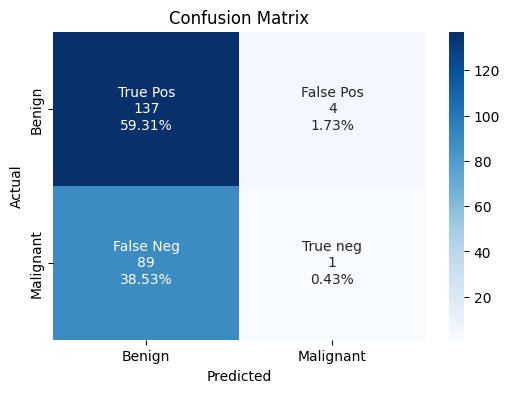

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       141
           1       0.20      0.01      0.02        90

    accuracy                           0.60       231
   macro avg       0.40      0.49      0.38       231
weighted avg       0.45      0.60      0.46       231



In [7]:
## Train-Test split 0.3
FBouBernoulli(0.3)
FBouBernoulli(0.3, 1.0, 1.5)
FBouBernoulli(0.3, 1.0, 1.5, True)

Train-test split: 0.4
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


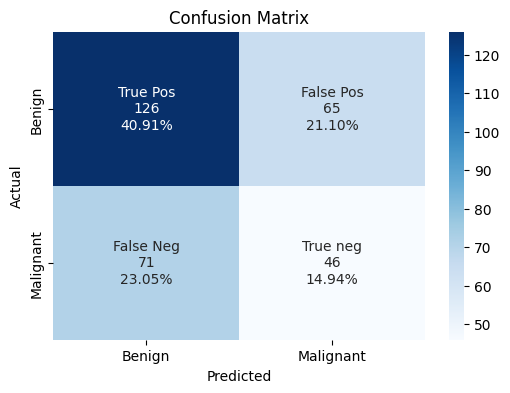

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       191
           1       0.41      0.39      0.40       117

    accuracy                           0.56       308
   macro avg       0.53      0.53      0.53       308
weighted avg       0.55      0.56      0.56       308



In [8]:
## Train-Test split 0.4
FBouBernoulli(0.4)

Train-test split: 0.5
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


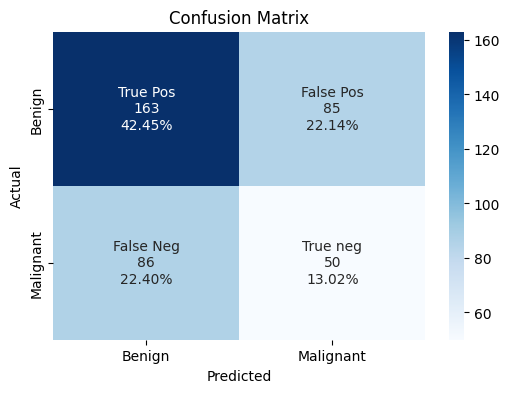

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       248
           1       0.37      0.37      0.37       136

    accuracy                           0.55       384
   macro avg       0.51      0.51      0.51       384
weighted avg       0.55      0.55      0.55       384

Train-test split: 0.5
value: alpha: 1.0 binarize: 7.9 fit_prior: False
**********************************************
Confusion Matrix : 


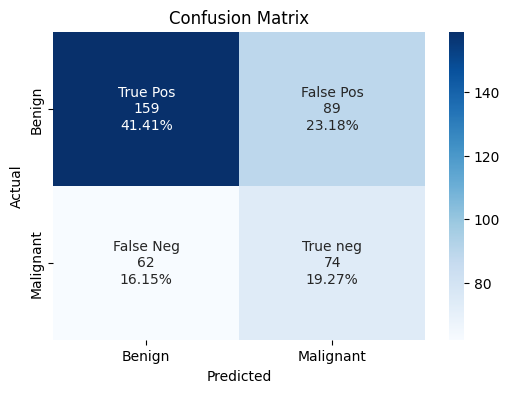

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       248
           1       0.45      0.54      0.49       136

    accuracy                           0.61       384
   macro avg       0.59      0.59      0.59       384
weighted avg       0.63      0.61      0.61       384

Train-test split: 0.5
value: alpha: 1.0 binarize: 7.9 fit_prior: True
**********************************************
Confusion Matrix : 


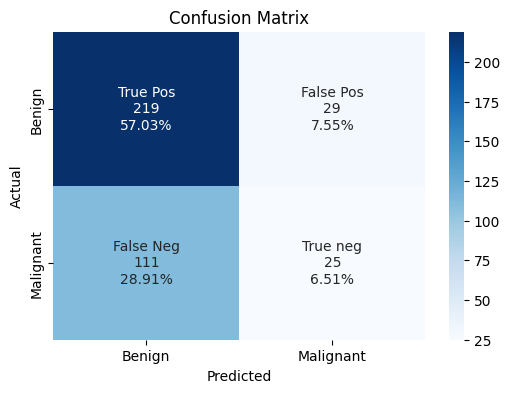

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       248
           1       0.46      0.18      0.26       136

    accuracy                           0.64       384
   macro avg       0.56      0.53      0.51       384
weighted avg       0.59      0.64      0.58       384



In [9]:

## Train-Test split 0.5
FBouBernoulli(0.5)
FBouBernoulli(0.5, 1.0, 7.9)
FBouBernoulli(0.5, 1.0, 7.9, True)

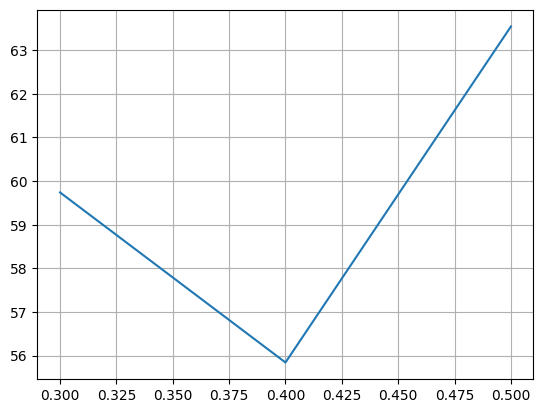

In [10]:
x_points = [float(key) for key in dict_bnb]
y_points = [i*100 for i in dict_bnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

## Classification using Multinomial Naive Bayes

Train-test split: 0.2
value: alpha: 1.0
**********************************************
Confusion Matrix : 


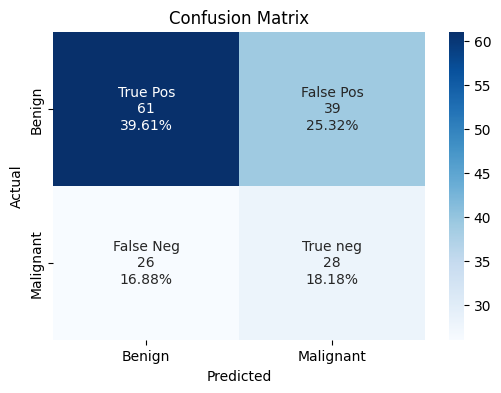

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       100
           1       0.42      0.52      0.46        54

    accuracy                           0.58       154
   macro avg       0.56      0.56      0.56       154
weighted avg       0.60      0.58      0.59       154

Confusion Matrix : 


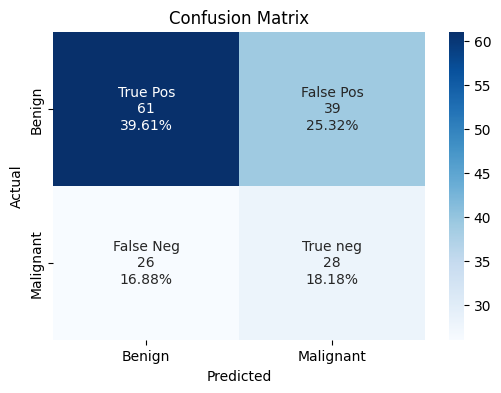

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       100
           1       0.42      0.52      0.46        54

    accuracy                           0.58       154
   macro avg       0.56      0.56      0.56       154
weighted avg       0.60      0.58      0.59       154

Train-test split: 0.2
value: alpha: 1.8
**********************************************
Confusion Matrix : 


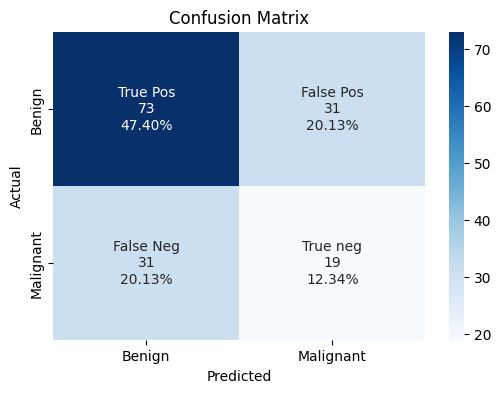

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       104
           1       0.38      0.38      0.38        50

    accuracy                           0.60       154
   macro avg       0.54      0.54      0.54       154
weighted avg       0.60      0.60      0.60       154

Confusion Matrix : 


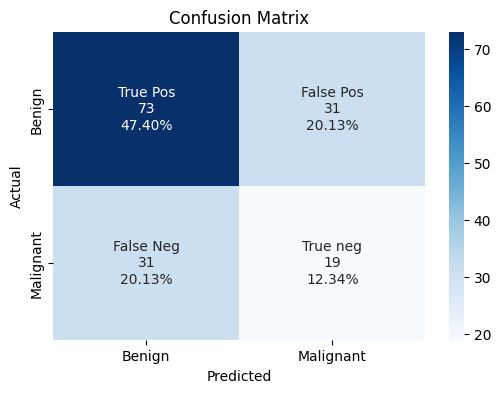

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       104
           1       0.38      0.38      0.38        50

    accuracy                           0.60       154
   macro avg       0.54      0.54      0.54       154
weighted avg       0.60      0.60      0.60       154



In [11]:
def FMultinomial(split, alpha_value = 1.0):
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)
  classifier = MultinomialNB(alpha = alpha_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value))
  print("**********************************************")
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_mnb:
    dict_mnb[str(split)] = max(accuracy, dict_mnb[str(split)])
    if str(split) == '0.3' and accuracy > dict_mnb[str(split)]:
      RocAucmnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_mnb[str(split)] = accuracy
    if str(split) == '0.3':
      RocAucmnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)
  reports(y_test, y_pred)

## Train-Test split 0.2
FMultinomial(0.2)
FMultinomial(0.2, 1.8)


Train-test split: 0.3
value: alpha: 1.0
**********************************************
Confusion Matrix : 


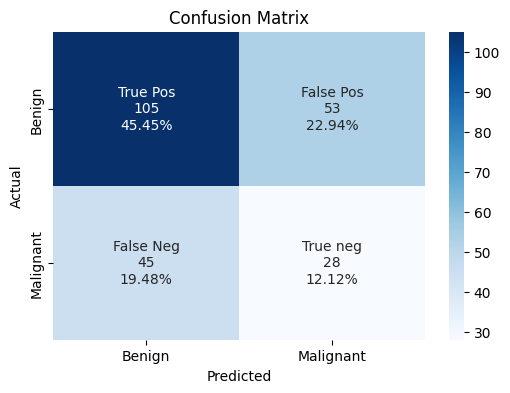

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       158
           1       0.35      0.38      0.36        73

    accuracy                           0.58       231
   macro avg       0.52      0.52      0.52       231
weighted avg       0.59      0.58      0.58       231

Confusion Matrix : 


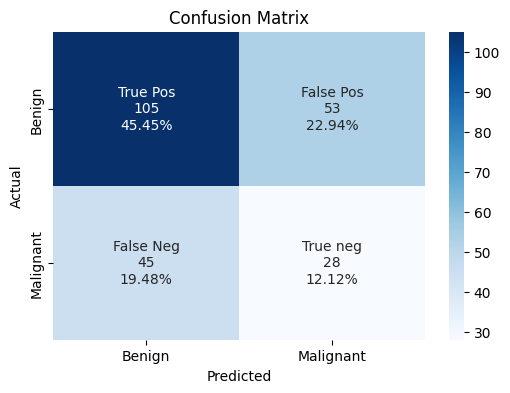

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       158
           1       0.35      0.38      0.36        73

    accuracy                           0.58       231
   macro avg       0.52      0.52      0.52       231
weighted avg       0.59      0.58      0.58       231

Train-test split: 0.3
value: alpha: 2.9
**********************************************
Confusion Matrix : 


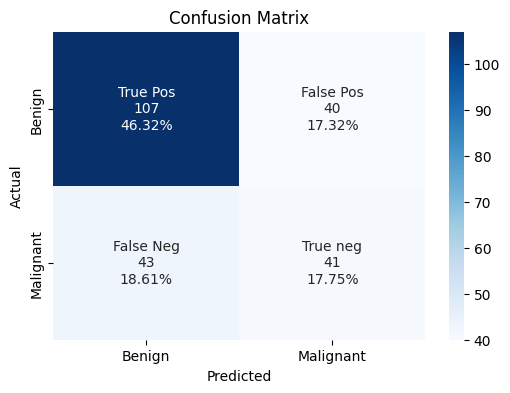

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       147
           1       0.51      0.49      0.50        84

    accuracy                           0.64       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.64      0.64      0.64       231

Confusion Matrix : 


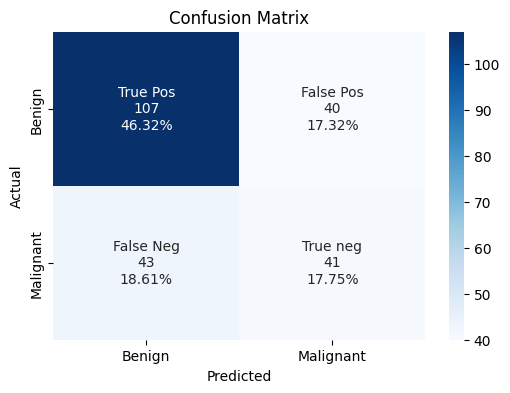

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       147
           1       0.51      0.49      0.50        84

    accuracy                           0.64       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.64      0.64      0.64       231



In [12]:
## Train-Test split 0.3
FMultinomial(0.3)
FMultinomial(0.3, 2.9)

Train-test split: 0.4
value: alpha: 1.0
**********************************************
Confusion Matrix : 


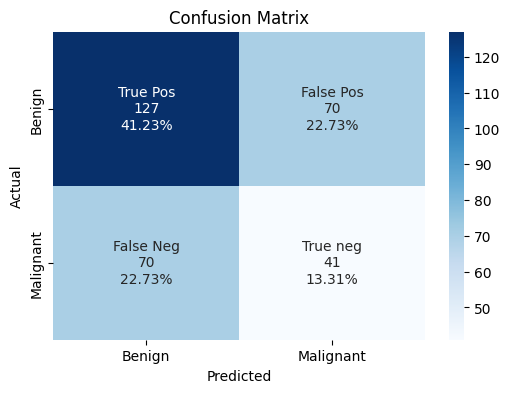

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       197
           1       0.37      0.37      0.37       111

    accuracy                           0.55       308
   macro avg       0.51      0.51      0.51       308
weighted avg       0.55      0.55      0.55       308

Confusion Matrix : 


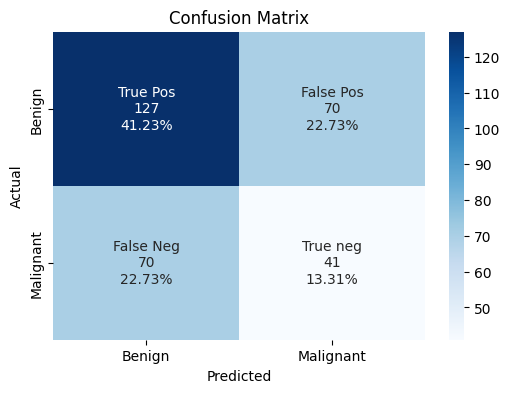

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       197
           1       0.37      0.37      0.37       111

    accuracy                           0.55       308
   macro avg       0.51      0.51      0.51       308
weighted avg       0.55      0.55      0.55       308

Train-test split: 0.4
value: alpha: 1.1
**********************************************
Confusion Matrix : 


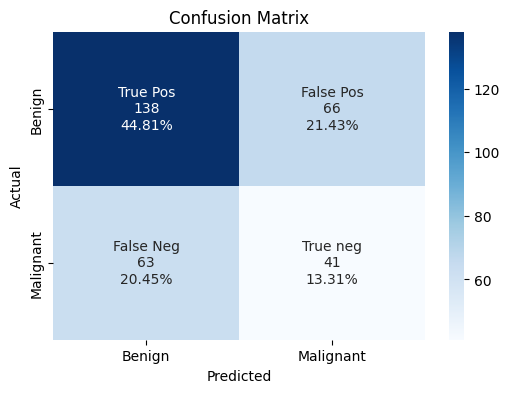

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       204
           1       0.38      0.39      0.39       104

    accuracy                           0.58       308
   macro avg       0.53      0.54      0.54       308
weighted avg       0.58      0.58      0.58       308

Confusion Matrix : 


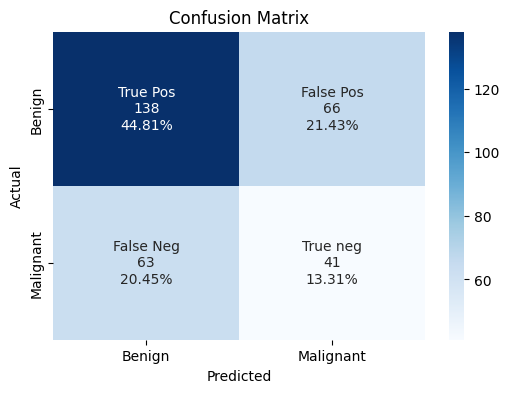

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       204
           1       0.38      0.39      0.39       104

    accuracy                           0.58       308
   macro avg       0.53      0.54      0.54       308
weighted avg       0.58      0.58      0.58       308



In [13]:
## Train-Test split 0.4
FMultinomial(0.4)
FMultinomial(0.4, 1.1)

Train-test split: 0.5
value: alpha: 1.0
**********************************************
Confusion Matrix : 


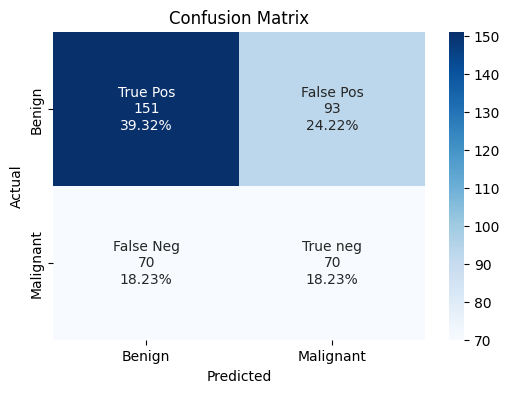

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       244
           1       0.43      0.50      0.46       140

    accuracy                           0.58       384
   macro avg       0.56      0.56      0.56       384
weighted avg       0.59      0.58      0.58       384

Confusion Matrix : 


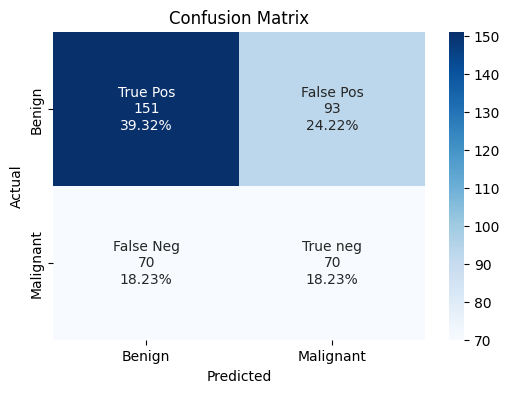

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       244
           1       0.43      0.50      0.46       140

    accuracy                           0.58       384
   macro avg       0.56      0.56      0.56       384
weighted avg       0.59      0.58      0.58       384

Train-test split: 0.5
value: alpha: 4.8
**********************************************
Confusion Matrix : 


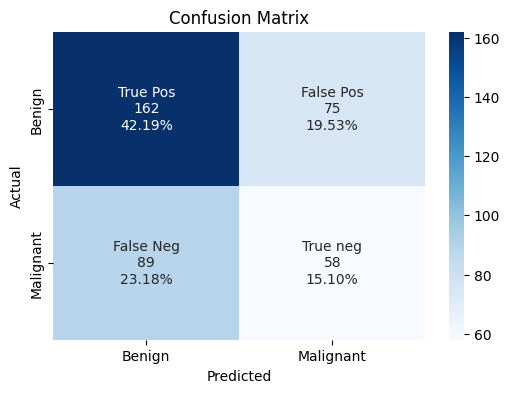

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       237
           1       0.44      0.39      0.41       147

    accuracy                           0.57       384
   macro avg       0.54      0.54      0.54       384
weighted avg       0.57      0.57      0.57       384

Confusion Matrix : 


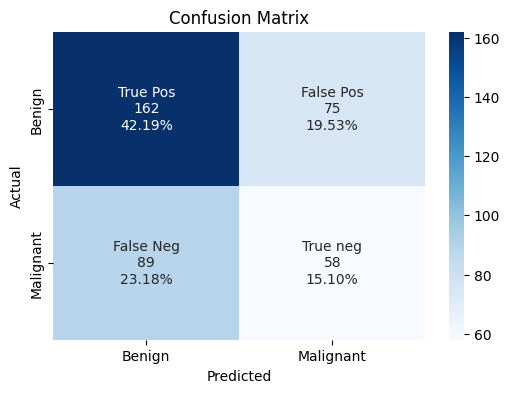

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       237
           1       0.44      0.39      0.41       147

    accuracy                           0.57       384
   macro avg       0.54      0.54      0.54       384
weighted avg       0.57      0.57      0.57       384



In [14]:
## Train-Test split 0.5
FMultinomial(0.5)
FMultinomial(0.5, 4.8)

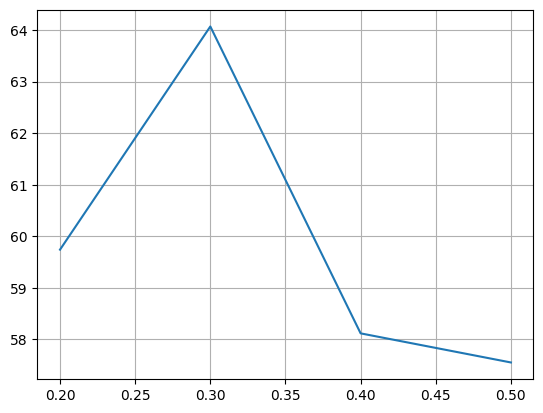

In [15]:
x_points = [float(key) for key in dict_mnb]
y_points = [i*100 for i in dict_mnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Guassian Naive Bayes**

Train-test split: 0.2
**********************************************
Confusion Matrix : 


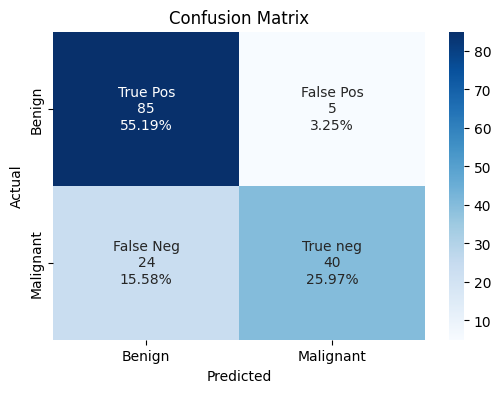

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        90
           1       0.89      0.62      0.73        64

    accuracy                           0.81       154
   macro avg       0.83      0.78      0.79       154
weighted avg       0.83      0.81      0.80       154



In [16]:
def FGaussian(split):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("**********************************************")
  reports(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  if(str(split) in dict_gnb):
    dict_gnb[str(split)] = max(accuracy, dict_gnb[str(split)])
    if(str(split) == '0.3' and accuracy > dict_bnb[str(split)]):
      RocAucgnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_gnb[str(split)] = accuracy
    RocAucgnb['max'] = {'y_test': y_test, 'y_pred': y_pred}

## Train-Test split 0.2
FGaussian(0.2)


Train-test split: 0.3
**********************************************
Confusion Matrix : 


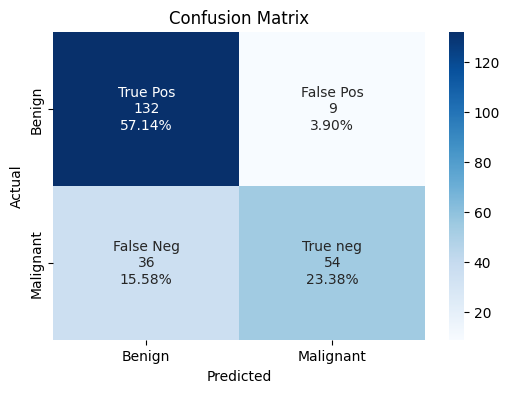

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.85       141
           1       0.86      0.60      0.71        90

    accuracy                           0.81       231
   macro avg       0.82      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231



In [17]:
## Train-Test split 0.3
FGaussian(0.3)

Train-test split: 0.4
**********************************************
Confusion Matrix : 


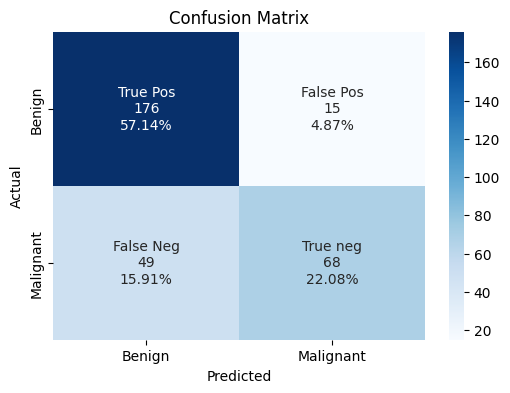

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       191
           1       0.82      0.58      0.68       117

    accuracy                           0.79       308
   macro avg       0.80      0.75      0.76       308
weighted avg       0.80      0.79      0.78       308



In [18]:
## Train-Test split 0.4
FGaussian(0.4)

Train-test split: 0.5
**********************************************
Confusion Matrix : 


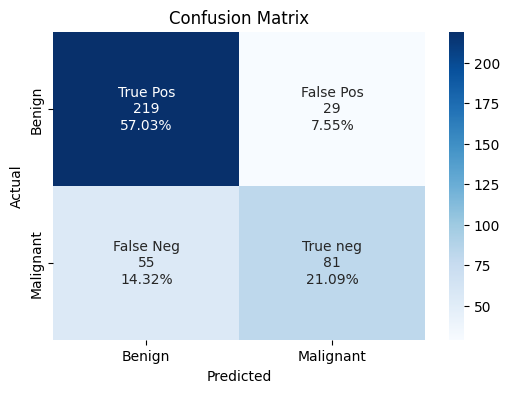

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       248
           1       0.74      0.60      0.66       136

    accuracy                           0.78       384
   macro avg       0.77      0.74      0.75       384
weighted avg       0.78      0.78      0.78       384



In [19]:

## Train-Test split 0.5
FGaussian(0.5)

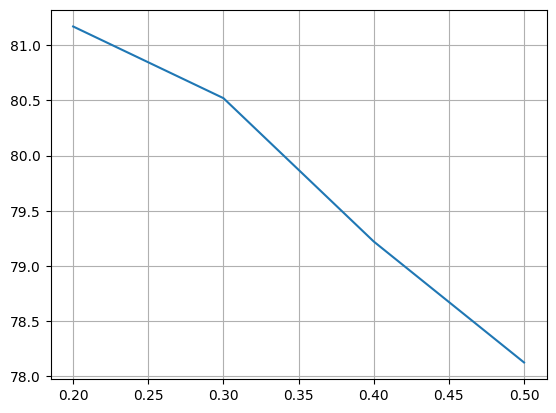

In [20]:
x_points = [float(key) for key in dict_gnb]
y_points = [i*100 for i in dict_gnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Decision Tree**

In [21]:
def decision_tree(split, criterion_value):
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import tree
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)

  classifier = DecisionTreeClassifier(criterion = criterion_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("Value: Entropy: " + criterion_value)
  print("**********************************************")
  reports(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_dtr):
    dict_dtr[str(split)] = max(accuracy, dict_dtr[str(split)])
    if(str(split) == '0.3' and accuracy > dict_bnb[str(split)]):
      RocAucdtr['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_dtr[str(split)] = accuracy
    if(str(split) == '0.3'):
      RocAucdtr['max'] = {'y_test': y_test, 'y_pred': y_pred}
      
  fig = plt.figure(figsize=(12,8))
  _ = tree.plot_tree(classifier,
                    feature_names=column_names,
                    class_names=['outcome1', 'outcome2'],
                    filled=True)
  


Train-test split: 0.2
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


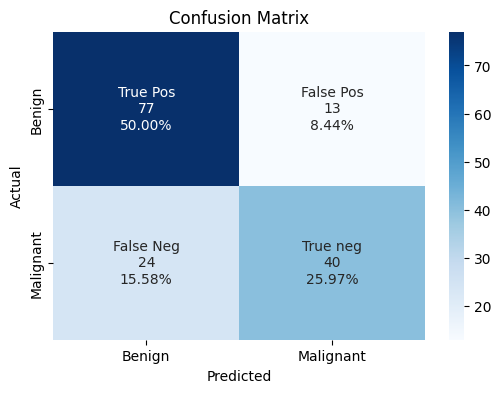

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        90
           1       0.75      0.62      0.68        64

    accuracy                           0.76       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.76      0.76      0.76       154



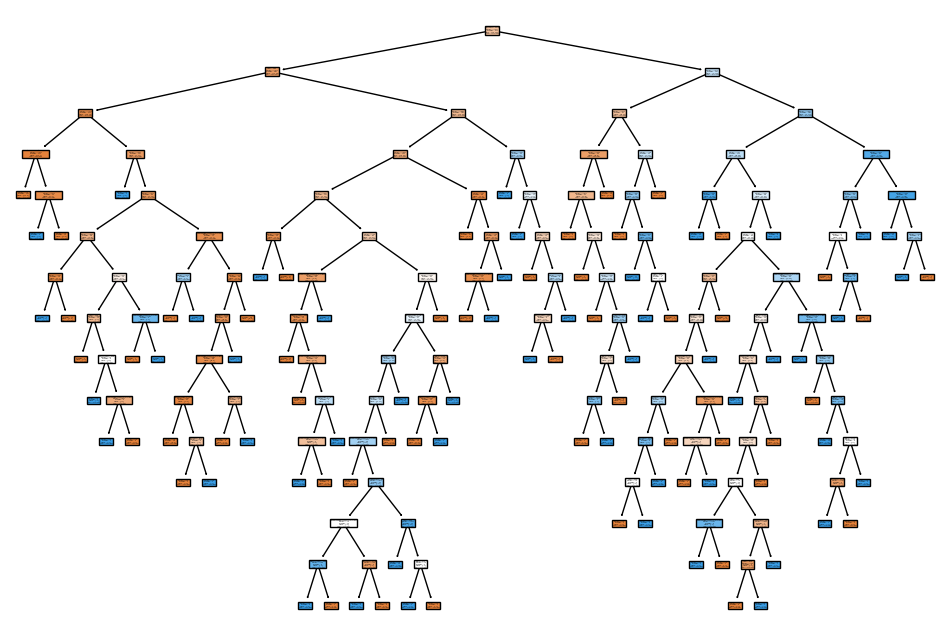

In [22]:
decision_tree(0.2, 'entropy')

Train-test split: 0.2
Value: Entropy: gini
**********************************************
Confusion Matrix : 


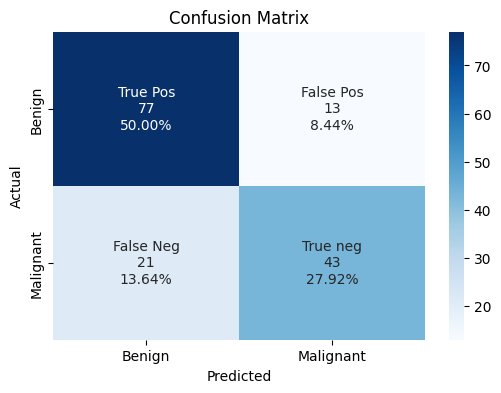

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        90
           1       0.77      0.67      0.72        64

    accuracy                           0.78       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.78      0.78      0.78       154



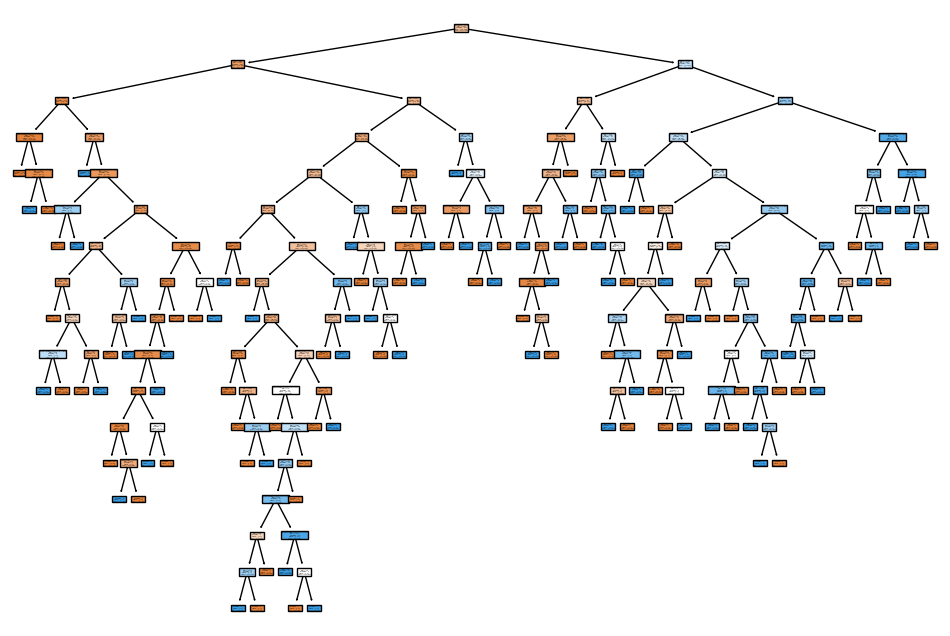

In [23]:
decision_tree(0.2, 'gini')

Train-test split: 0.3
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


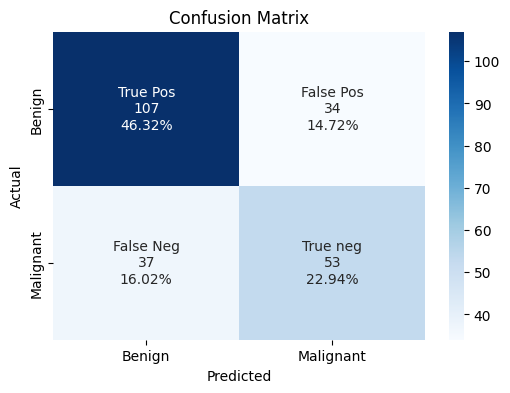

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       141
           1       0.61      0.59      0.60        90

    accuracy                           0.69       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.69      0.69      0.69       231



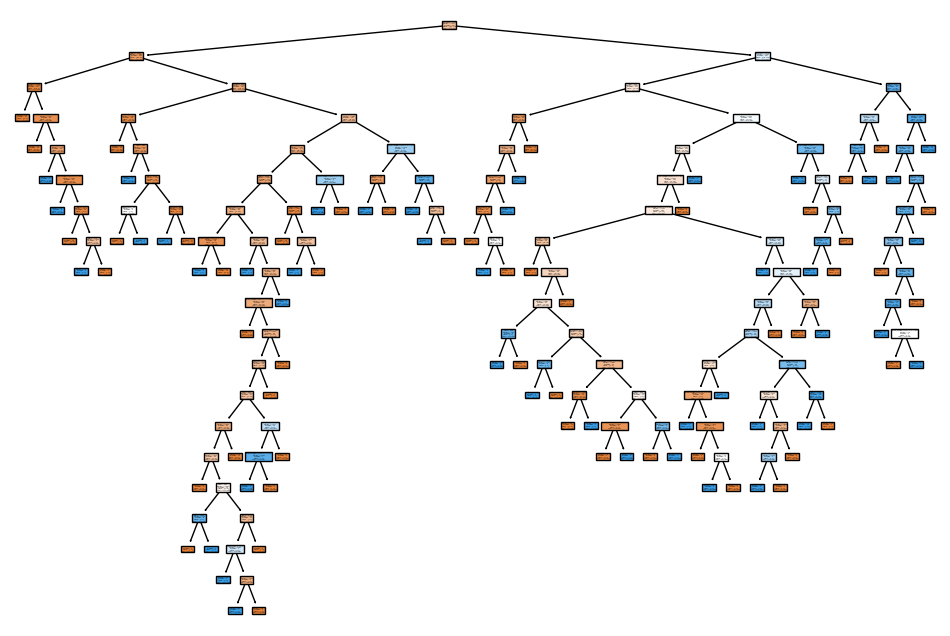

In [24]:
decision_tree(0.3, 'entropy')

Train-test split: 0.3
Value: Entropy: gini
**********************************************
Confusion Matrix : 


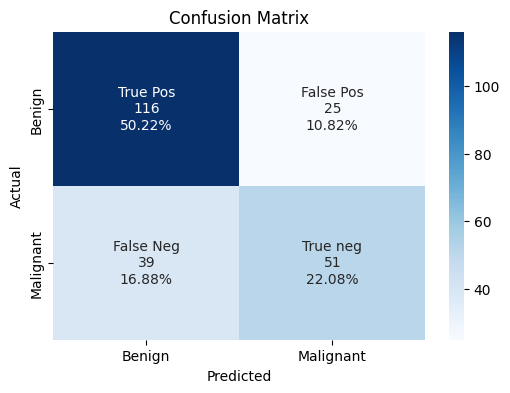

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       141
           1       0.67      0.57      0.61        90

    accuracy                           0.72       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.72      0.72      0.72       231



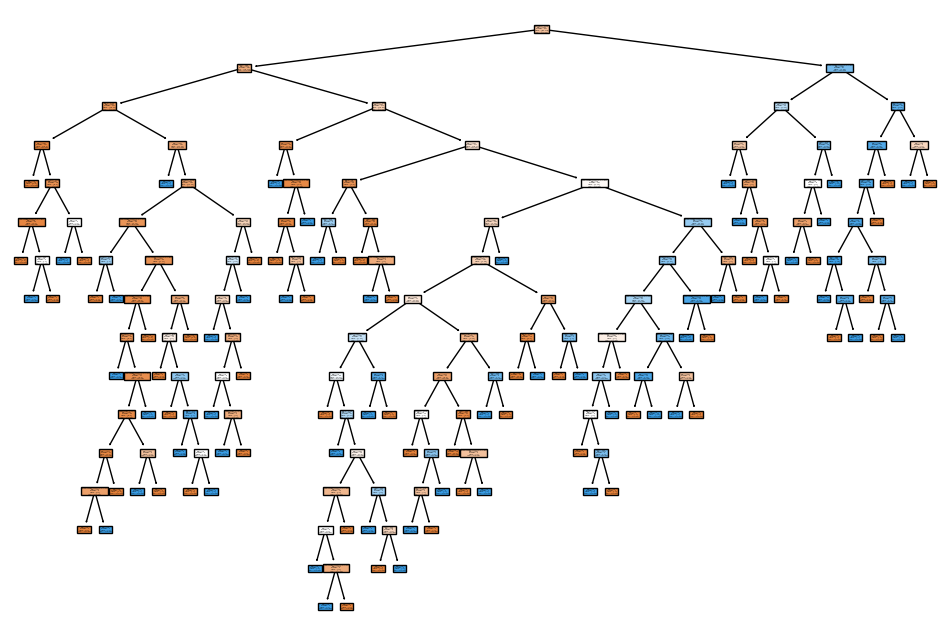

In [25]:
decision_tree(0.3, 'gini')

Train-test split: 0.4
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


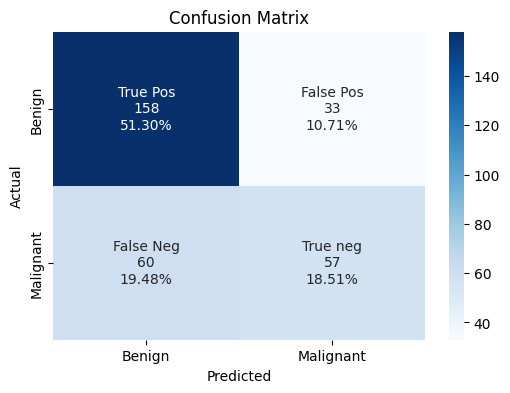

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       191
           1       0.63      0.49      0.55       117

    accuracy                           0.70       308
   macro avg       0.68      0.66      0.66       308
weighted avg       0.69      0.70      0.69       308



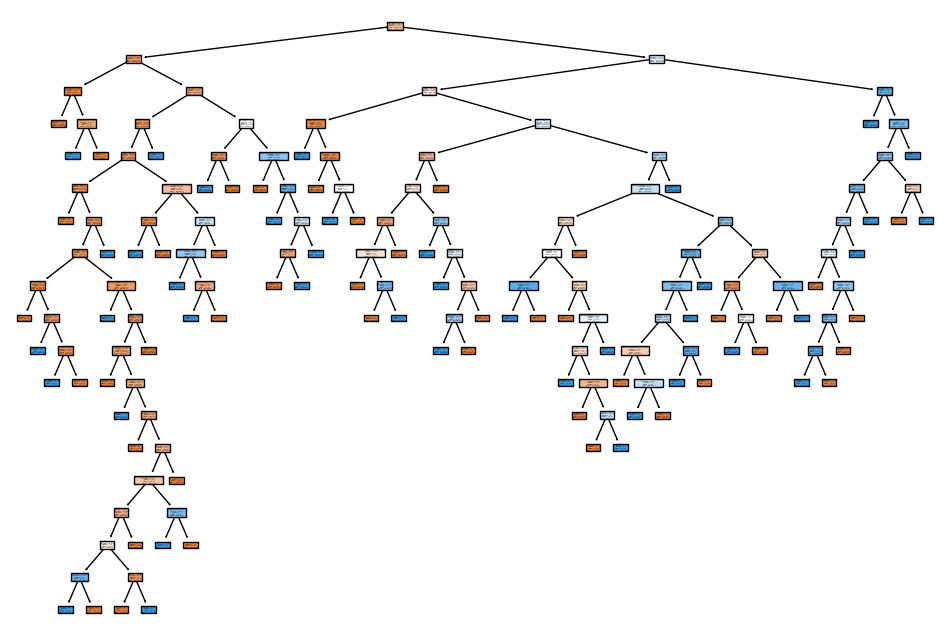

In [26]:
decision_tree(0.4, 'entropy')

Train-test split: 0.4
Value: Entropy: gini
**********************************************
Confusion Matrix : 


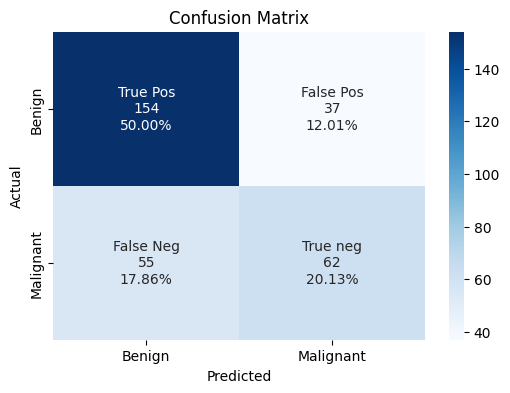

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       191
           1       0.63      0.53      0.57       117

    accuracy                           0.70       308
   macro avg       0.68      0.67      0.67       308
weighted avg       0.69      0.70      0.70       308



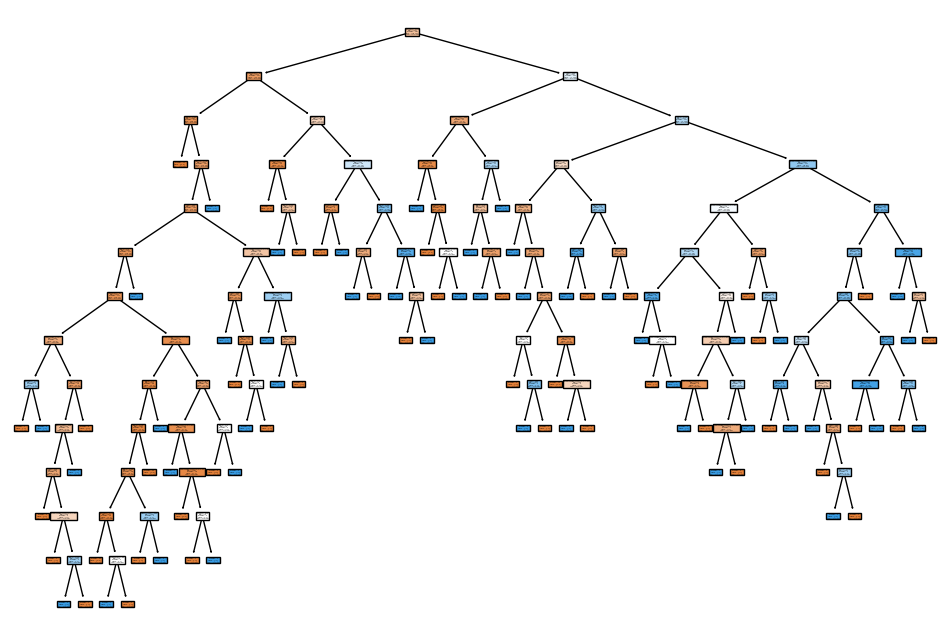

In [27]:
decision_tree(0.4, 'gini')

Train-test split: 0.5
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


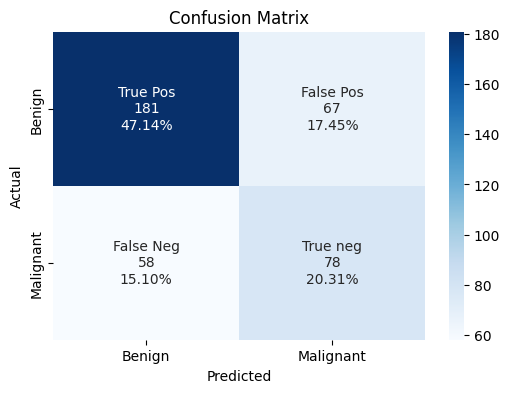

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       248
           1       0.54      0.57      0.56       136

    accuracy                           0.67       384
   macro avg       0.65      0.65      0.65       384
weighted avg       0.68      0.67      0.68       384



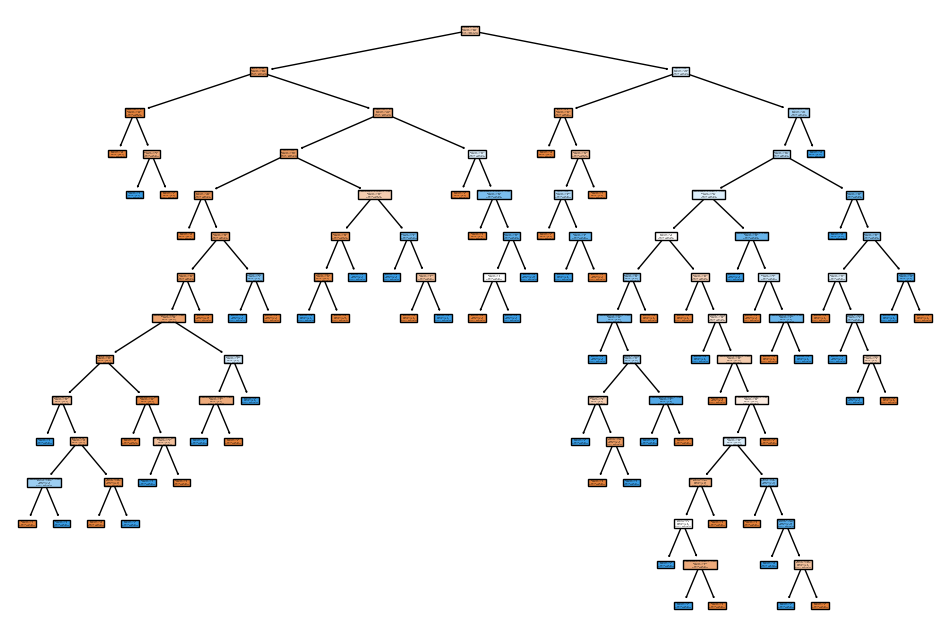

In [28]:
decision_tree(0.5, 'entropy')

Train-test split: 0.5
Value: Entropy: gini
**********************************************
Confusion Matrix : 


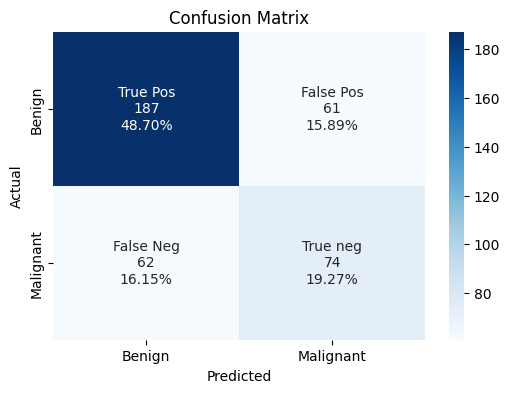

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       248
           1       0.55      0.54      0.55       136

    accuracy                           0.68       384
   macro avg       0.65      0.65      0.65       384
weighted avg       0.68      0.68      0.68       384



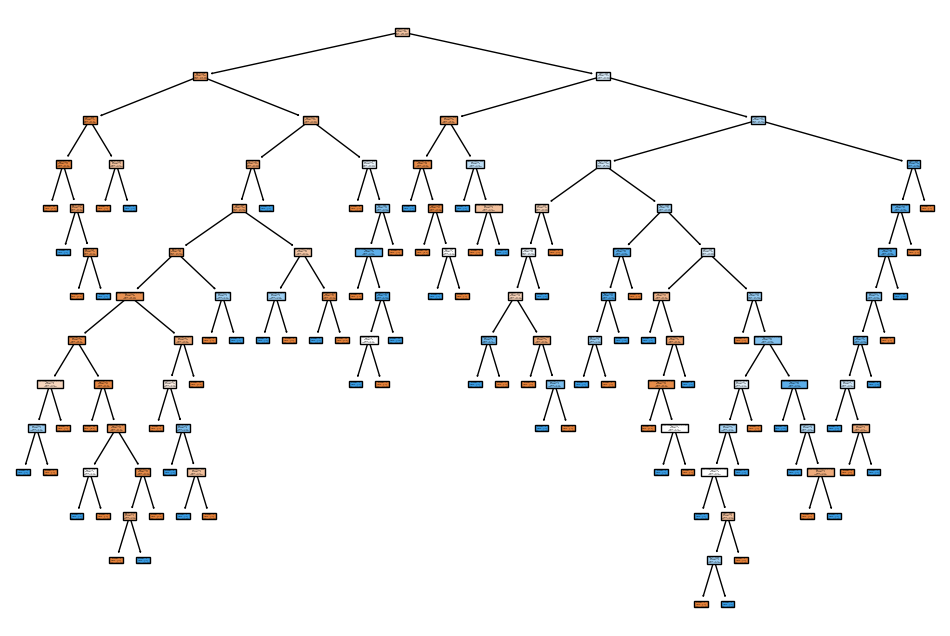

In [29]:
decision_tree(0.5, 'gini')

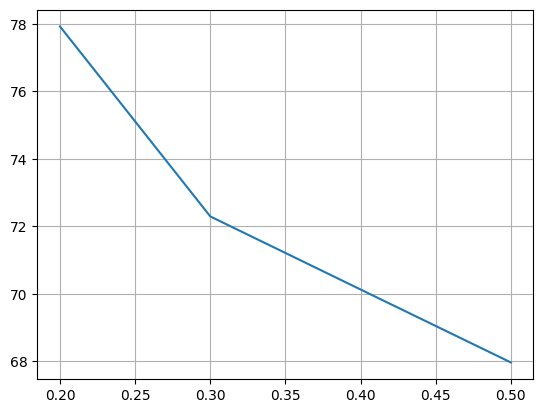

In [30]:
x_points = [float(key) for key in dict_dtr]
y_points = [i*100 for i in dict_dtr.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

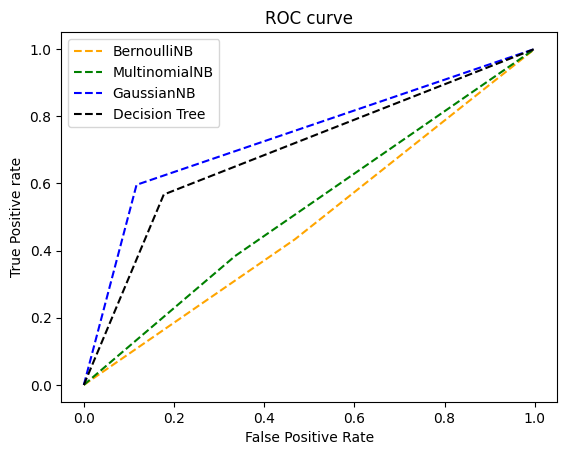

In [31]:
from sklearn import metrics
def auc_roc():
    fpr1, tpr1, _1 = metrics.roc_curve(RocAucbnb['max']['y_test'], RocAucbnb['max']['y_pred'], pos_label=1)
    fpr4, tpr4, _3 = metrics.roc_curve(RocAucmnb['max']['y_test'], RocAucmnb['max']['y_pred'], pos_label=1)
    fpr2, tpr2, _2 = metrics.roc_curve(RocAucgnb['max']['y_test'], RocAucgnb['max']['y_pred'], pos_label=1)
    fpr3, tpr3, _3 = metrics.roc_curve(RocAucdtr['max']['y_test'], RocAucdtr['max']['y_pred'], pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='BernoulliNB')
    plt.plot(fpr4, tpr4, linestyle='--',color='green', label='MultinomialNB')
    plt.plot(fpr2, tpr2, linestyle='--', color='blue', label= 'GaussianNB')
    plt.plot(fpr3, tpr3, linestyle='--', color='black', label= 'Decision Tree')
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()
auc_roc()